In [1]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import itertools
from collections import Counter
from decimal import Decimal

In [2]:
def get_utility(Pr_y, k):
  u=0
  for i in range(k+1):
    u += Pr_y[i] * i/k
  return u

In [3]:
def geo2_sum_term(eps,miu,lower,upper):
  r = 0
  for i in range(lower, upper+1):
    r += math.exp(-eps*abs(i-miu))
  return r

In [5]:
def geo2(k,n,eps,miu):
  #=================
  Pr_y = []
  c= (1-math.exp(-eps))/(1+math.exp(-eps))

  for y in range(k+1):
    s = float(0)
    b= (math.factorial(k) * math.factorial(k))/(math.factorial(y) * math.factorial(k-y) * math.factorial(k-y) )
    for a in range(max(k-y,0),n+1):
      s = s + c *float((math.factorial(a) * math.factorial(a) * math.exp(-eps*abs(a-miu))*math.factorial(k) * math.factorial(k))) / float((math.factorial(a-k+y) * math.factorial(k+a)*math.factorial(y) * math.factorial(k-y) * math.factorial(k-y)))
    if y==k:
      Pr_y.append(s)
    else:
      Pr_y.append((s + c*math.exp(-eps*abs((y-k-miu)))))
  # print(sum(Pr_y))
  print('sum P',sum(Pr_y))
  utility_geo2 = get_utility(Pr_y, k)


  # c= (1-math.exp(-eps))/(1+math.exp(-eps))
  eps_geo2 = [0]*(k+1)
  for y in range(k+1):
    num = 0
    den = math.exp(-eps*abs(y-k-1-miu))*(k-y+1)/(k+1)
    b= (math.factorial(k) * math.factorial(k))/(math.factorial(y) * math.factorial(k-y) * math.factorial(k-y) )
    for i in range(max(k-y,0),n+1):
      num += b*math.factorial(i)*math.factorial(i)*math.exp(-eps*abs(i-miu))/(math.factorial(i-k+y)*math.factorial(k+i))
    for i in range(max(k-y-1,0),n+1):
      den += b*math.factorial(i+1)*math.factorial(i+1)*math.exp(-eps*abs(i-miu))/(math.factorial(i+1-k+y)*math.factorial(k+i+1))
    if y!=k:
      num += math.exp(-eps*abs(y-k-miu))
      den += math.exp(-eps*abs(y-k-miu))*(y+1)/(k+1)
    # if y==0:
    #   num += geo2_sum_term(eps=eps, miu=miu, lower=-n, upper=-k-1)
    #   den += geo2_sum_term(eps=eps, miu=miu, lower=-n, upper=-k-2)
    if num==0 or den==0:
      eps_geo2[y]=float('inf')
    else:
      eps_geo2[y] = np.log(max(num/den,den/num))

  print("=================")
  print('GEO2 - epsilon,utility',max(eps_geo2),utility_geo2)
  print(max(eps_geo2), eps_geo2.index(max(eps_geo2)))
  if sum(Pr_y) >0.9:
    return max(eps_geo2),utility_geo2
  else:
    return 0,0

In [6]:
def geo1(k,n,p,xl):
  Pr_y1 = []
  for y in range(k+1):
    s = float(0)
    b= p*(math.factorial(k) * math.factorial(k))/(math.factorial(y) * math.factorial(k-y) * math.factorial(k-y) )
    for a in range(max(k-y,xl),n+1):
      s += b*((1-p)**(a-xl))*math.factorial(a)*math.factorial(a)/(math.factorial(a-k+y)*math.factorial(k+a))
    # if xl < y-k or xl==y-k:
    #   Pr_y1.append(s+(1-p)**(y-k-xl))
    # else:
    Pr_y1.append(s)
    print('sum P',sum(Pr_y1))

  if sum(Pr_y1)>0.9:
    utility_geo1 = get_utility(Pr_y1, k)
    eps_geo = [0]*(k+1)
    for y in range(0,k+1):
      Pr_geo = p*math.factorial(k)*math.factorial(k)/(math.factorial(y)*math.factorial(k-y)*math.factorial(k-y))
      s_num = 0
      s_den = 0
      for i in range(max(k-y,xl,0),n+1):
        s_num += (1-p)**(i-xl)*math.factorial(i)*math.factorial(i)/(math.factorial(i-k+y)*math.factorial(k+i))
      for i in range(max(k-y-1,xl,0),n+1):
        s_den += (1-p)**(i-xl)*math.factorial(i+1)*math.factorial(i+1)/(math.factorial(i+1-k+y)*math.factorial(k+i+1))
      Xp=0
      X=0
      if y <k and y >= (k+xl):
        X+=(1-p)**(y-k-xl)
        Xp+=(p*(1+y)*(1-p)**(y-k-xl))/(k+1)
      if y<=k and y >= (k+xl+1):
        Xp+=(p*(k-y+1)*(1-p)**(y-k-xl-1))/(k+1)
      if y==0:
        if xl<-k:
          X += 1-(1-p)**(-k-xl)
        if xl<-k-1:
          Xp += 1-(1-p)**(-k-xl-1)
      num = s_num*Pr_geo + X
      den = s_den*Pr_geo + Xp
      if num==0 or den==0:
        eps_geo[y]=float('inf')
      else:
        eps_geo[y] = np.log(max(num/den,den/num))

    print("=================")
    print('GEO - epsilon,utility',max(eps_geo),utility_geo1)
    print(max(eps_geo), eps_geo.index(max(eps_geo)))
    return max(eps_geo),utility_geo1
  else:
    return 0,0

In [7]:
def uni(k,n,xl,xr):
  Pr_y3 = []
  p = 1/(xr-xl+1)
  for y in range(k+1):
    s = float(0)
    b= (math.factorial(k) * math.factorial(k))/(math.factorial(y) * math.factorial(k-y) * math.factorial(k-y) )
    for a in range(max(k-y,xl),xr+1):
      w=math.factorial(a)*math.factorial(a)/(math.factorial(a-k+y)*math.factorial(k+a))
      s += p*b*w
    if y < k and xl <= (y-k):
      s+=p
      if y==0 and xl < (-k):
        s+=p*(-k-xl)
    Pr_y3.append(s)
  print('sum P',sum(Pr_y3))
  if sum(Pr_y3)>0.99:
    utility_uni = get_utility(Pr_y3, k)
    eps_uni=[0]*(k+1)
    test_num=[]
    for y in range(0,k+1):
      num = 0
      den = 0
      for i in range(max(xl,k-y,0),xr+1):
        num += math.factorial(k)*math.factorial(k)*math.factorial(i)*math.factorial(i)/(math.factorial(y)*math.factorial(k-y)*math.factorial(k-y)*math.factorial(i-k+y)*math.factorial(k+i))
      for i in range(max(xl,k-y-1,0),xr+1):
        den += math.factorial(k)*math.factorial(k)*math.factorial(i+1)*math.factorial(i+1)/(math.factorial(y)*math.factorial(k-y)*math.factorial(k-y)*math.factorial(i+1-k+y)*math.factorial(k+i+1))
      if y<k and y>=xl+k:
        num += 1
        den += (y+1)/(k+1)
        if y<=k and y>=xl+k+1:
          den+= (k-y+1)/(k+1)
      if y==0:
        if xl < -k:
          num += -k-xl
        if xl < -k-1:
          den += -k-xl -1
      if num==0 or den ==0:
        eps_uni[y] = float('inf')
      else:
        eps_uni[y] = np.log(max(num/den,den/num))
      test_num.append(den*p)
    print('sum test_num',sum(test_num))

    print("=================")
    print('UNI - epsilon,utility',max(eps_uni),utility_uni)
    print(max(eps_uni), eps_uni.index(max(eps_uni)))
    return max(eps_uni),utility_uni
  else:
    return 0,0

In [8]:
k = 10
n = 91 #inf

In [9]:
#geo2
# eps = 0.93
# miu=20
S = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3.2,3.4,3.6,3.8,4,4.2,4.4,4.6,4.8,5]
MIU = [-10, 0, 5, 10]
# S = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
# MIU = range(0,50,1)
el=[]
ul=[]
el_all=[]
ul_all = []
for miu in MIU:
  el_geo2=[]
  ul_geo2=[]
  for s in S:
    e,u = geo2(k=k,n=n,eps=1/s,miu=miu)
    el_geo2.append(e)
    ul_geo2.append(u)
    if e!= 0 and u!=0:
      el_all.append(e)
      ul_all.append(u)
  el.append(el_geo2)
  ul.append(ul_geo2)

sum P 0.9999546021312976
GEO2 - epsilon,utility 9.904698900140405 4.539992985606109e-06
9.904698900140405 1
sum P 0.9933071490757154
GEO2 - epsilon,utility 4.906036502411813 0.0006738252915294543
4.906036502411813 1
sum P 0.9655548043337889
GEO2 - epsilon,utility 3.2451326199447488 0.003571945112812312
3.2451326199447488 1
sum P 0.9241418199787562
GEO2 - epsilon,utility 2.420973517947443 0.008264183492537191
2.420973517947443 1
sum P 0.8807970779778823
GEO2 - epsilon,utility 1.9313970427275189 0.013786028184992666
1.9313970427275189 1
sum P 0.8411308951190849
GEO2 - epsilon,utility 1.6084356012826118 0.019586279024592857
1.6084356012826118 1
sum P 0.8066786301976911
GEO2 - epsilon,utility 1.3800782363494377 0.025425318351166952
1.3800782363494377 1
sum P 0.7772998611746911
GEO2 - epsilon,utility 1.2104092163308202 0.03121234729114141
1.2104092163308202 1
sum P 0.7523361988609283
GEO2 - epsilon,utility 1.079562836170021 0.036919259653986784
1.079562836170021 1
sum P 0.6970592839654076
G

/var/folders/x9/z2pzxf912fdcy7630673mhg40000gn/T/ipykernel_13163/798086451.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


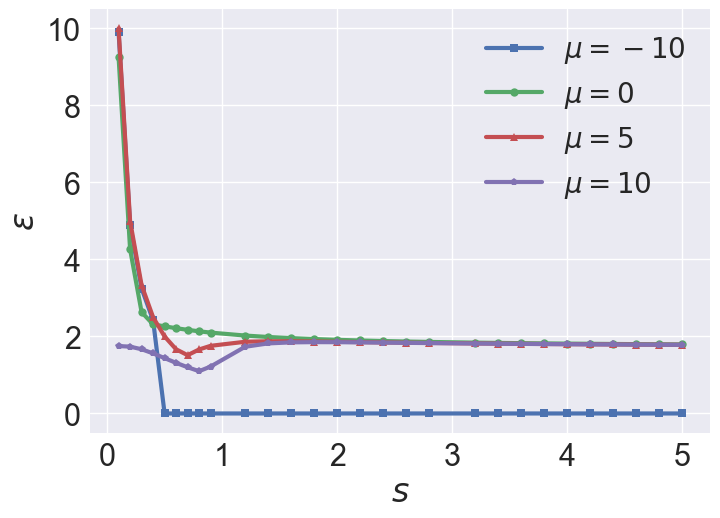

In [11]:
plt.style.use("seaborn")
plt.figure()
plt.plot(S,el[0],marker='s', markersize=6, linewidth=3,label=r'$\mu = -10$')
plt.plot(S,el[1],marker='o', markersize=6, linewidth=3,label=r'$\mu = 0$')
plt.plot(S,el[2],marker='^', markersize=6, linewidth=3,label=r'$\mu = 5$')
plt.plot(S,el[3],marker='p', markersize=6, linewidth=3,label=r'$\mu = 10$')

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.ylabel(r'$\epsilon$', fontsize=24)
plt.xlabel(r'$s$', fontsize=24)
plt.legend(loc='upper right',fontsize = 20)
plt.savefig('geo2_eps.pdf', bbox_inches = "tight")
plt.show()

0.1976,
0.2189,
0.2396,
0.2580,
0.2794,
0.2957,
0.3140,
0.3587,
0.3718,
0.4015,
0.4360,
0.4774,
0.5011,
0.5009,
0.5272,
0.5271,
0.5563,
0.5562,
0.5889,
0.5888,
0.6254

/var/folders/x9/z2pzxf912fdcy7630673mhg40000gn/T/ipykernel_13163/125826044.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


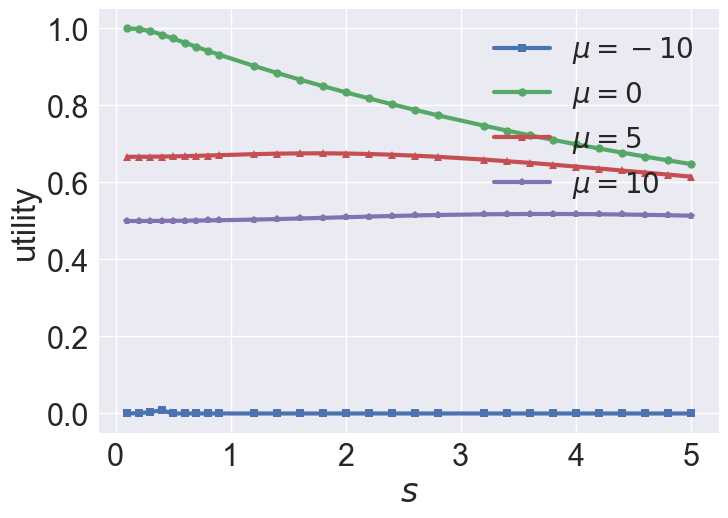

In [12]:
plt.style.use("seaborn")
plt.figure()
plt.plot(S,ul[0],marker='s', markersize=6, linewidth=3,label=r'$\mu = -10$')
plt.plot(S,ul[1],marker='o', markersize=6, linewidth=3,label=r'$\mu = 0$')
plt.plot(S,ul[2],marker='^', markersize=6, linewidth=3,label=r'$\mu = 5$')
plt.plot(S,ul[3],marker='p', markersize=6, linewidth=3,label=r'$\mu = 10$')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.ylabel(r'utility', fontsize=24)
plt.xlabel(r'$s$', fontsize=24)
plt.legend(loc='upper right',fontsize = 20)
plt.savefig('geo2_utility.pdf', bbox_inches = "tight")
plt.show()

In [13]:
#geo1
P=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# P=[0.7]
# xl = 0
Xl = [-50,-10,0,10,20]
# Xl=list(range(0,101,2))
# Xl=[3]
el =[]
ul=[]
el_all = []
ul_all = []
for xl in Xl:
  el_geo=[]
  ul_geo=[]
  for p in P:
    e,u = geo1(k=k,n=n,p=p,xl=xl)
    el_geo.append(e)
    ul_geo.append(u)
    if e!=0 and u!=0:
      el_all.append(e)
      ul_all.append(u)
  el.append(el_geo)
  ul.append(ul_geo)

sum P 2.441307043628956e-05
sum P 0.000132256775232573
sum P 0.0003824549267913971
sum P 0.0007946548729250123
sum P 0.0013437148600618089
sum P 0.0019805872337479765
sum P 0.002655286156650445
sum P 0.003329268255620837
sum P 0.003977865055906924
sum P 0.004587778511253653
sum P 0.0051534572005686695
sum P 3.6709197204130853e-09
sum P 3.252596927388063e-08
sum P 1.4694329858174177e-07
sum P 4.5409422352073423e-07
sum P 1.0865739882672857e-06
sum P 2.1601756010588916e-06
sum P 3.7366549470481965e-06
sum P 5.810713440511889e-06
sum P 8.321449241149987e-06
sum P 1.117597001422417e-05
sum P 1.4272476909730452e-05
sum P 3.489536233861882e-13
sum P 4.493716794193331e-12
sum P 2.8846401634511697e-11
sum P 1.2356556832587175e-10
sum P 3.991126277801682e-10
sum P 1.0417890985874304e-09
sum P 2.3005319284241658e-09
sum P 4.442504454598033e-09
sum P 7.694846490752997e-09
sum P 1.2197675543911867e-08
sum P 1.7984650426473955e-08
sum P 1.2364299586758053e-17
sum P 2.222267021822937e-16
sum P 1.963

/var/folders/x9/z2pzxf912fdcy7630673mhg40000gn/T/ipykernel_13163/2458066871.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


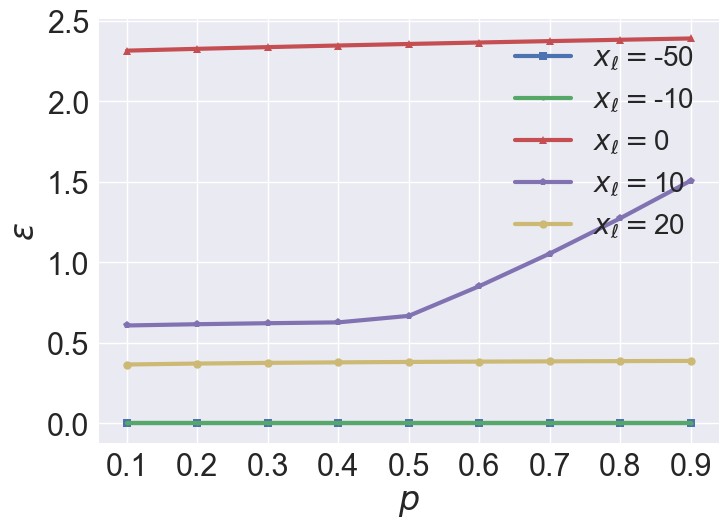

In [14]:
plt.style.use("seaborn")
plt.figure()
MARKER = ['s','.','^','p','o']
for i in range(len(Xl)):
  plt.plot(P,el[i],marker=MARKER[i], markersize=6, linewidth=3,label=r'$x_{\ell} = $'+str(Xl[i]))

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.ylabel(r'$\epsilon$', fontsize=24)
plt.xlabel(r'$p$', fontsize=24)
plt.legend(loc='upper right',fontsize = 20)
plt.savefig('geo1_eps.pdf', bbox_inches = "tight")
plt.show()

/var/folders/x9/z2pzxf912fdcy7630673mhg40000gn/T/ipykernel_13163/1736460633.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


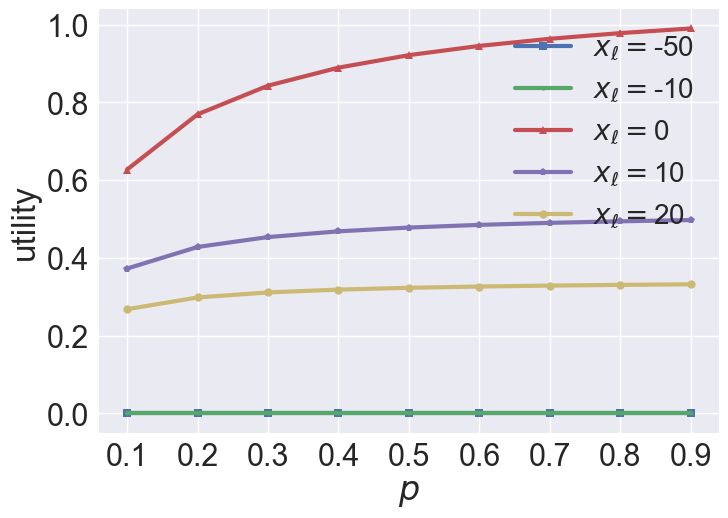

In [15]:
plt.style.use("seaborn")
plt.figure()
MARKER = ['s','.','^','p','o']
for i in range(len(Xl)):
  plt.plot(P,ul[i],marker=MARKER[i], markersize=6, linewidth=3,label=r'$x_{\ell} = $'+str(Xl[i]))

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.ylabel(r'utility', fontsize=24)
plt.xlabel(r'$p$', fontsize=24)
plt.legend(loc='upper right',fontsize = 20)
plt.savefig('geo1_utility.pdf', bbox_inches = "tight")
plt.show()

In [16]:
#uni
k=10
n=91
Xl = range(-15,11, 1)
# Xl=[0]
Xr = [10,15,20]
el=[]
ul=[]

el_all=[]
ul_all=[]
for xr in Xr:
  el_uni=[]
  ul_uni=[]
  for xl in Xl:
    e,u = uni(k=k,n=n,xl=xl,xr=xr)
    el_uni.append(e)
    ul_uni.append(u)
    if e!=0 and u!=0:
      el_all.append(e)
      ul_all.append(u)
  el.append(el_uni)
  ul.append(ul_uni)


sum P 1.0
sum test_num 0.9965034965034966
UNI - epsilon,utility 2.3026131614623977 0.4687582319905492
2.3026131614623977 10
sum P 1.0
sum test_num 0.9963636363636363
UNI - epsilon,utility 2.3026131614623977 0.48750856127017117
2.3026131614623977 10
sum P 0.9999999999999999
sum test_num 0.9962121212121211
UNI - epsilon,utility 2.3026131614623977 0.5078214179897615
2.3026131614623977 10
sum P 0.9999999999999999
sum test_num 0.9960474308300394
UNI - epsilon,utility 2.3026131614623977 0.529900610076273
2.3026131614623977 10
sum P 0.9999999999999999
sum test_num 0.9958677685950412
UNI - epsilon,utility 2.3026131614623977 0.5539870014433763
2.3026131614623977 10
sum P 1.0
sum test_num 0.9956709956709956
UNI - epsilon,utility 2.397498176159648 0.5803673348454419
2.397498176159648 0
sum P 1.0
sum test_num 0.9954545454545454
UNI - epsilon,utility 2.3026131614623977 0.609385701587714
2.3026131614623977 10
sum P 1.0
sum test_num 0.9952153110047847
UNI - epsilon,utility 2.3026131614623977 0.636195

/var/folders/x9/z2pzxf912fdcy7630673mhg40000gn/T/ipykernel_13163/2491356710.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


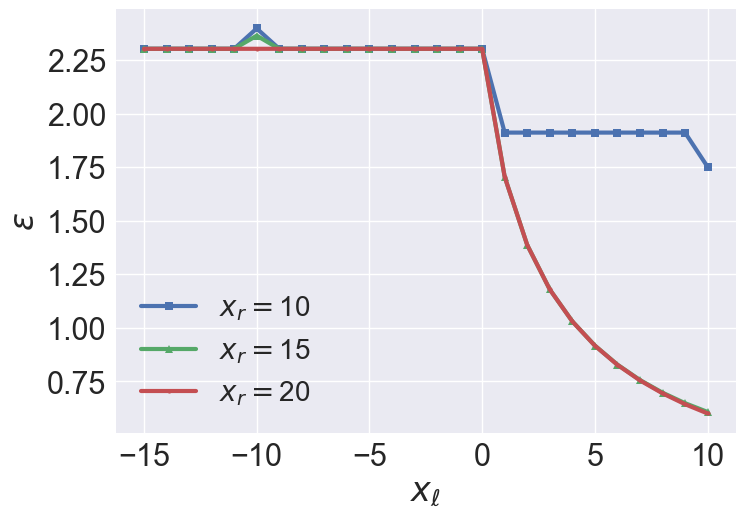

In [17]:
plt.style.use("seaborn")
plt.figure()
MARKER =['s','^','.']
for i in range(len(el)):
  plt.plot(Xl,el[i],marker=MARKER[i], markersize=6, linewidth=3,label=r'$x_r = $'+str(Xr[i]))
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.ylabel(r'$\epsilon$', fontsize=24)
plt.xlabel(r'$x_{\ell}$', fontsize=24)
plt.legend(loc='best',fontsize = 20)
plt.savefig('uni_eps.pdf', bbox_inches = "tight")
plt.show()

/var/folders/x9/z2pzxf912fdcy7630673mhg40000gn/T/ipykernel_13163/2278813176.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


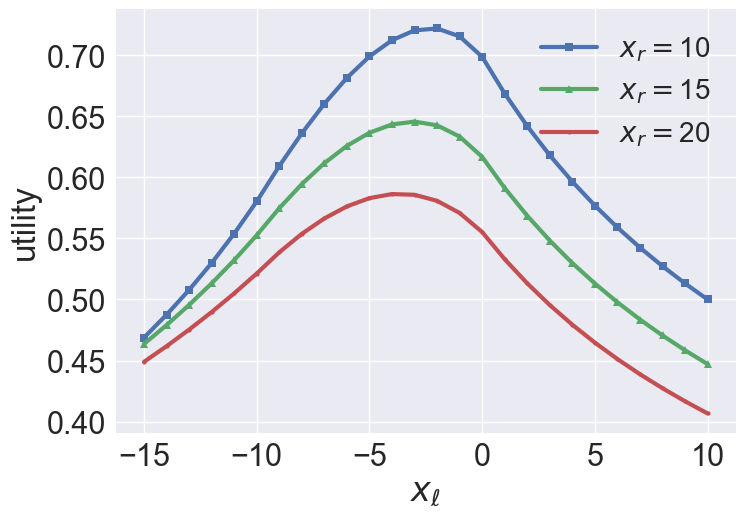

In [18]:
plt.style.use("seaborn")
plt.figure()
MARKER =['s','^','.']
for i in range(len(ul)):
  plt.plot(Xl,ul[i],marker=MARKER[i], markersize=6, linewidth=3,label=r'$x_r = $'+str(Xr[i]))
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.ylabel(r'utility', fontsize=24)
plt.xlabel(r'$x_{\ell}$', fontsize=24)
plt.legend(loc='upper right',fontsize = 20)
plt.savefig('uni_utility.pdf', bbox_inches = "tight")
plt.show()

In [19]:
def cst(k,d):
  Pr_y4 = []
  for y in range(k+1):
    s = (math.factorial(k)*math.factorial(k)*math.factorial(d)*math.factorial(d))/(math.factorial(y)*math.factorial(k-y)*math.factorial(k-y)*math.factorial(d-k+y)*math.factorial(k+d))
    Pr_y4.append(s)

  utility_cst = get_utility(Pr_y4, k)
  eps=[0]*(k+1)
  for y in range(k+1):
    eps[y] = ((k+d+1)*(d+y+1-k))/((k+d+1-k)*(d+1))
  print("=================")
  print('CST - epsilon,utility',max(np.log(eps)) ,utility_cst)
  return max(np.log(eps)),utility_cst

In [20]:
#const
n=200
el_all=[]
ul_all=[]
for d in range(k,50):
  e,u = cst(k=k,d=d)
  el_all.append(e)
  ul_all.append(u)


CST - epsilon,utility 0.6466271649250525 0.5
CST - epsilon,utility 0.6061358035703155 0.4761904761904762
CST - epsilon,utility 0.5705448584676129 0.4545454545454546
CST - epsilon,utility 0.5389965007326869 0.43478260869565216
CST - epsilon,utility 0.5108256237659907 0.4166666666666667
CST - epsilon,utility 0.4855078157817008 0.4000000000000001
CST - epsilon,utility 0.46262352194811296 0.3846153846153847
CST - epsilon,utility 0.44183275227903923 0.3703703703703703
CST - epsilon,utility 0.4228568508200336 0.35714285714285726
CST - epsilon,utility 0.4054651081081644 0.3448275862068966
CST - epsilon,utility 0.3894647667617233 0.3333333333333333
CST - epsilon,utility 0.3746934494414107 0.32258064516129037
CST - epsilon,utility 0.3610133455373305 0.31249999999999994
CST - epsilon,utility 0.3483066942682158 0.30303030303030304
CST - epsilon,utility 0.3364722366212129 0.29411764705882354
CST - epsilon,utility 0.32542240043462795 0.28571428571428575
CST - epsilon,utility 0.31508104663989545 0.2